In [1]:
import sys; sys.path.insert(0, "../"); from utils import *
from models import VAE, vae_loss, AutoEncoder, ae_loss, real2cplx, complex_mse, ComplexAutoEncoder
from tqdm import trange

%matplotlib inline
import matplotlib.pyplot as plt

import cplxmodule.nn as cnn
from cplxmodule.nn import RealToCplx, CplxToCplx, CplxToReal

You can use npar for np.array


In [2]:
X = torch.rand(100, 2)
X = real2cplx(X)

In [3]:
ae = ComplexAutoEncoder()

/usr/local/lib/python3.9/site-packages/torch/nn/modules/container.py:587: UserWarning: Setting attributes on ParameterDict is not supported.
  warnings.warn("Setting attributes on ParameterDict is not supported.")


In [4]:
opt = torch.optim.Adam(ae.parameters(), lr=1e-2)

100%|██████████| 10000/10000 [00:19<00:00, 511.24it/s]


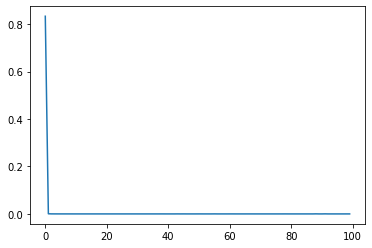

In [5]:
hist = []
for i in trange(10000):
    opt.zero_grad()
    loss = ae.compute_loss(X)
    loss.backward()
    opt.step()
    if i%100==0: hist.append(loss.item())
plt.plot(hist)

In [6]:
ae.eval()
recon_X = ae(X)

In [7]:
complex_mse(recon_X, X)

tensor(1.5210e-07, grad_fn=<AddBackward0>)